In [9]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123456)

In [3]:
n=1000
r=1000

beta0 = 1
beta1 = 0.5 
su = 2
sx = 1 
ex = 4

b0 =  np.empty(r)
b1 = np.empty(r)

In [31]:
for i in range(r): 
    x = stats.norm.rvs(loc=0, scale=sx, size=n)
    u = stats.norm.rvs(loc=0, scale=su, size=n)
    y = beta0 + beta1*x + u
df = pd.DataFrame({'y':y, 'x':x})
results = sm.OLS.from_formula('y ~ x', data=df).fit()
b0[i] = results.params["Intercept"]
b1[i] = results.params["x"]
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)   


In [32]:
results = sm.OLS.from_formula('y ~ x', data=df).fit()
b0[i] = results.params["Intercept"]
b1[i] = results.params["x"]
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)   


In [33]:
b0_mean

nan

In [34]:
b1_mean

nan

In [35]:
b0

array([ 0.00000000e+000,  6.95091334e-310,  0.00000000e+000,
        6.95091310e-310,  6.95091304e-310,  6.95091554e-310,
        6.95091439e-310,  6.95091329e-310,  6.95091575e-310,
        6.95091439e-310,  6.95091565e-310,  6.95091439e-310,
        6.95091558e-310,  6.95091310e-310,  6.95091430e-310,
        6.95091436e-310,  6.95091554e-310,  6.95091065e-310,
        6.95091439e-310,  6.95091553e-310,  6.95091439e-310,
        6.95091576e-310,  6.95091576e-310,  6.95091439e-310,
        6.95091087e-310,  6.95091310e-310,  6.95091304e-310,
        6.95091439e-310,  6.95091439e-310,  6.95091439e-310,
        6.95091554e-310,  6.95091439e-310,  6.95091439e-310,
        6.95091439e-310,  6.95091439e-310,  6.95091305e-310,
        6.95091439e-310,  6.95091067e-310,  6.95091439e-310,
        6.95091439e-310,  6.95091439e-310,  6.95091575e-310,
        6.95091329e-310,  6.95091439e-310,  6.95091576e-310,
        6.95091576e-310,  6.95091439e-310,  6.95091544e-310,
        6.95091558e-310,

In [43]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

# Define your parameters
r = 1000  # number of simulations
n = 100   # sample size
beta0 = .5 # intercept
beta1 = 1 # slope
sx = 1    # standard deviation of x
su = 1    # standard deviation of u

# Initialize arrays to store coefficients
b0 = np.zeros(r)
b1 = np.zeros(r)

# Simulation loop
for i in range(r):
    x = stats.norm.rvs(loc=0, scale=sx, size=n)
    u = stats.norm.rvs(loc=0, scale=su, size=n)
    y = beta0 + beta1*x + u
    df = pd.DataFrame({'y': y, 'x': x})
    results = smf.ols('y ~ x', data=df).fit()
    b0[i] = results.params["Intercept"]
    b1[i] = results.params["x"]

# Calculate means
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print("Average Intercept:", b0_mean)
print("Average Slope:", b1_mean)


Average Intercept: 0.49804541271322517
Average Slope: 1.003975002089696


In [44]:
b0_var = np.var(b0,ddof =1)

In [45]:
b1_var = np.var(b1,ddof =1)

In [46]:
b1_var

0.010439244826390547

In [47]:
b0_var

0.010353305448152862

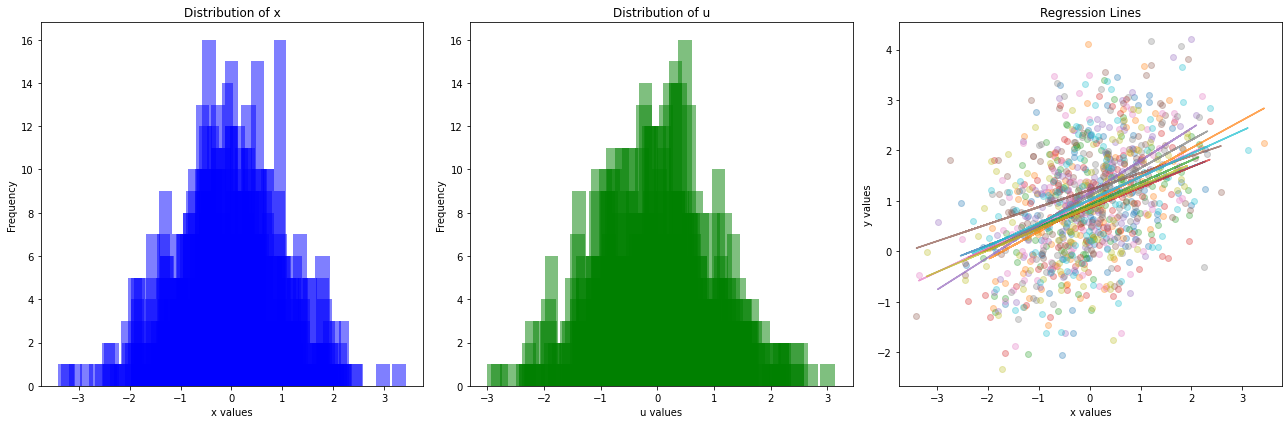

Average Intercept: 0.49804541271322517
Average Slope: 1.003975002089696


In [54]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define your parameters
r = 10    # number of simulations (reduced for visualization purposes)
n = 100   # sample size
beta0 = 1 # intercept
beta1 = .5 # slope
sx = 1    # standard deviation of x
su = 1    # standard deviation of u

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].set_title('Distribution of x')
axes[1].set_title('Distribution of u')
axes[2].set_title('Regression Lines')

# Run simulations and plot
for i in range(r):
    x = stats.norm.rvs(loc=0, scale=sx, size=n)
    u = stats.norm.rvs(loc=0, scale=su, size=n)
    y = beta0 + beta1*x + u
    df = pd.DataFrame({'y': y, 'x': x})
    results = smf.ols('y ~ x', data=df).fit()
    
    # Histograms of x and u
    axes[0].hist(x, bins=20, alpha=0.5, color='blue')
    axes[1].hist(u, bins=20, alpha=0.5, color='green')
    
    # Plot regression line
    axes[2].scatter(x, y, alpha=0.3)
    axes[2].plot(x, results.params["Intercept"] + results.params["x"] * x, alpha=0.7)

# Enhance plots
axes[0].set_xlabel('x values')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('u values')
axes[1].set_ylabel('Frequency')
axes[2].set_xlabel('x values')
axes[2].set_ylabel('y values')
plt.tight_layout()
plt.show()

# Calculate means
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print("Average Intercept:", b0_mean)
print("Average Slope:", b1_mean)